<a href="https://colab.research.google.com/github/clzndyal1/git_test/blob/master/Titanic_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
gender = pd.read_csv('/content/gender_submission.csv')

# 데이터 정보 확인하기
print(train_df.shape)
print(test_df.shape)
print(gender.shape)
print(train_df.columns.values)
print(test_df.columns.values)
print(gender.columns.values)

(891, 12)
(418, 11)
(418, 2)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
['PassengerId' 'Survived']


Variable	Definition	Key 

survival	생존여부	0 = No, 1 = Yes

pclass	사회-경제적 지위	1 = 1st, 2 = 2nd, 3 = 3rd

sex	성별	 
Age	나이	 
sibsp	타이타닉호에 탑승한 형제-자매 수	 
parch	타이타닉호에 탑승한 부모-자녀 수	 
ticket	티켓 번호	 
fare	탑승 요금	 
cabin	방 번호	 
embarked	탑승 지역(항구 위치)	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
#train의 NaN 갯수 확인하기
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#test NaN 갯수 확인하기
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#age에 있는 NaN 대체
mean_age = train_df['Age'].mean(axis=0)  #age 열의 평균 계산(NaN 제외)
train_df['Age'].fillna(mean_age, inplace=True)
train_df['Age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [ ]:
#age에 있는 NaN 대체
mean_age_test = test_df['Age'].mean(axis=0)  #age 열의 평균 계산(NaN 제외)
test_df['Age'].fillna(mean_age_test, inplace=True)
test_df['Age'].head(10)

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
5    14.0
6    30.0
7    26.0
8    18.0
9    21.0
Name: Age, dtype: float64

In [ ]:
#Embarked의 NaN 부분 가장 많이 나타나는 값으로 변경
most_train = train_df['Embarked'].value_counts(dropna=True).idxmax()
print(most_train)
train_df['Embarked'].fillna(most_train, inplace=True)

S


In [ ]:
#쓸모없는 데이터 삭제
train_thresh = train_df.dropna(axis=1, thresh=500)
print(train_thresh.columns)
train_thresh.info()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
def bar_chart(feature):
    # 각 column(=feature)에서 생존자 수 count
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    
    # 각 column(=feature)에서 사망자 수 count
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    
    # 생존자수, 사망자수를 하나의 dataframe으로 묶는다.
    df = pd.DataFrame([survived, dead])
    
    # 묶은 dataframe의 인덱스명(행 이름)을 지정한다.
    df.index = ['Survived', 'Dead']
    
    # plot을 그린다.
    df.plot(kind='bar', stacked=True, figsize=(10,5))


kind='bar'는 막대 그래프를 그리는 것을 의미하고, stacked=True는 각 특성 값 별로 생존자와 사망자 수를 쌓아 올린 형태로 그래프를 그린다는 것을 의미한다.

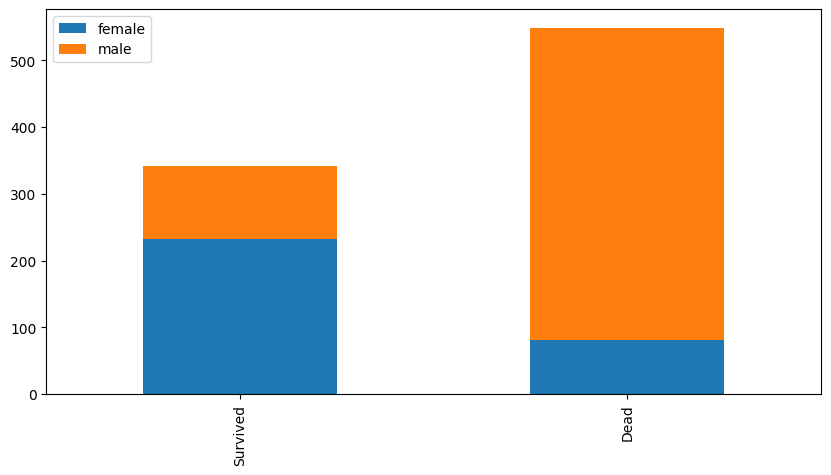

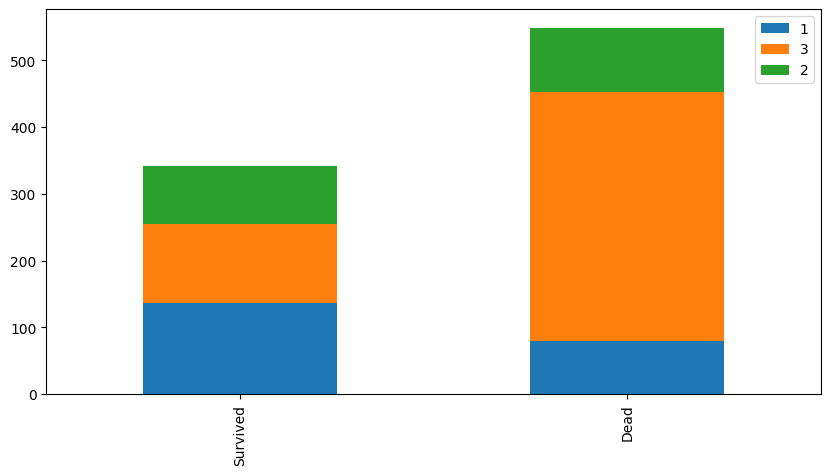

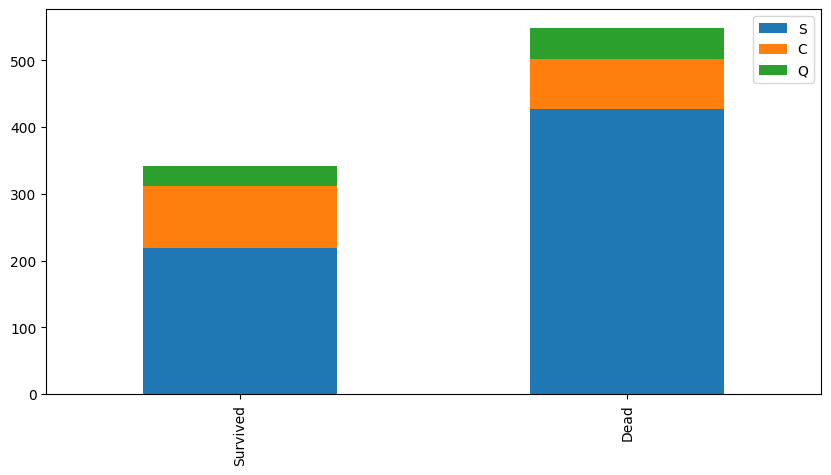

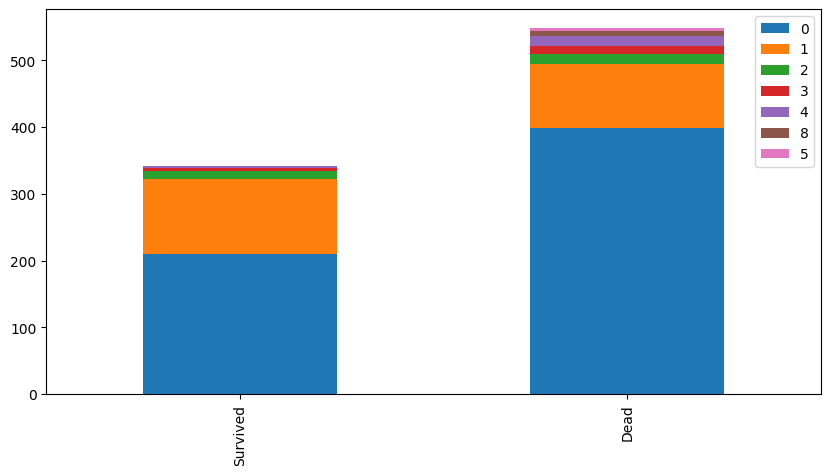

In [ ]:
#그래프로 그려서 데이터를 시각화해서 확인.
bar_chart('Sex')
bar_chart('Pclass')
bar_chart('Embarked')
bar_chart('SibSp')

https://codinglevelup.tistory.com/83

map함수 : 각 요소들에 특정한 함수를 적용시킬 때 쓰는 함수이다. 파이썬 표준에 포함 되어있는 내장 함수이다.

1개의 입력이 아니라, 여러개가 입력된 경우 각각의 요소들에 대해 특정한 함수를 적용시키고 싶을때,

지금은 int를 적용시키기 위해 쓴다.

In [ ]:
#train_df, test_df을(를) 리스트로 한번에 묶는다.
train_test_data = [train_df, test_df]

#map 함수를 써서 성별을 0과 1로 만든다.(딕셔너리)
sex_map = {'male':0, 'female':1}
for data in train_test_data:
  data['Sex'] = data['Sex'].map(sex_map)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#혼자 있는 사람과 가족이 있는 사람을 정의한다.

for data in train_test_data:
  #가족수 = 부모형제자매 + 1
  data['Family'] = data['SibSp'] + data['Parch'] + 1
  #본인
  data['Alone'] = 1
  #가족수가 1보다 클 시 본인의 열 값을 0으로 설정
  data.loc[data['Family'] > 1, 'Alone'] = 0

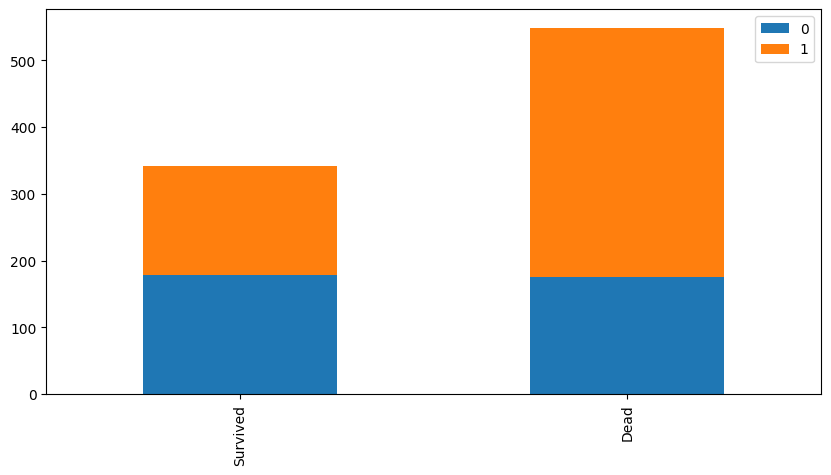

In [ ]:
bar_chart('Alone')

In [ ]:
#map 함수를 써서 탑승지역을 0,1,2로 만든다.(딕셔너리)

embarked_map = {'S':0, 'C':1, 'Q':2}
for data in train_test_data:
  data['Embarked'] = data['Embarked'].map(embarked_map)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1


In [ ]:
for data in train_test_data:
    data['AgeLabel'] = pd.cut(data['Age'], 5, labels=[0,1,2,3,4])

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone,AgeLabel
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,2


In [ ]:
#더이상 필요없는 데이터는 drop으로 없앤다.

drop_column = ['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']

for data in train_test_data:
    data = data.drop(drop_column, axis=1, inplace=True)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Family,Alone,AgeLabel
0,1,0,3,0,0,2,0,1
1,2,1,1,1,1,2,0,2
2,3,1,3,1,0,1,1,1
3,4,1,1,1,0,2,0,2
4,5,0,3,0,0,1,1,2


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Embarked     891 non-null    int64   
 5   Family       891 non-null    int64   
 6   Alone        891 non-null    int64   
 7   AgeLabel     891 non-null    category
dtypes: category(1), int64(7)
memory usage: 49.9 KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Embarked     418 non-null    int64   
 4   Family       418 non-null    int64   
 5   Alone        418 non-null    int64   
 6   AgeLabel     418 non-null    category
dtypes: category(1), int64(6)
memory usage: 20.3 KB


In [ ]:
#PassengerId는 순번이니 빼고 생존은 따로 지정

train_input = train_df[['Sex', 'Embarked', 'Family', 'Alone', 'AgeLabel']].to_numpy()
train_target = train_df['Survived'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(train_input, train_target, test_size = 0.1)

In [ ]:
#로지스틱 회귀로 기계학습을 한다.

log = LogisticRegression()
log.fit(train_input, train_target)
log.score(train_input, train_target)

0.797752808988764

In [ ]:
#랜덤 포레스트로 해본다.

rf = RandomForestClassifier()
rf.fit(train_input, train_target)
rf.score(train_input, train_target)

0.8339575530586767

In [ ]:
#SGDClassifier로 해본다.(확률적 경사하강법)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
sc = SGDClassifier(loss = 'log', max_iter = 10)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7765293383270911
0.7888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
#가우시안 나이브 베이즈 뷴류기

nb = GaussianNB()
nb.fit(train_scaled, train_target)
nb.score(test_scaled, test_target)

0.7666666666666667

In [ ]:
#서포트 벡터머신

svc = SVC()
svc.fit(train_scaled, train_target)
svc.score(test_scaled, test_target)

0.8222222222222222

In [ ]:
rf = DecisionTreeClassifier()
rf.fit(train_input, train_target)
test_data = test_df.drop("PassengerId", axis=1)
predict = rf.predict(train_scaled)
print(predict)

[1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1
 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1
 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0
 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1
 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1
 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0
 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1
 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1
 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 